In [4]:
import networkx as nx
import pandas as pd

In [5]:
ep_df = pd.read_csv('/workspaces/sRNAs_Interactomes/output/EP-OD0w11_highCovarage_results.csv')

ep_df[ep_df['name'] == 'StyR-29(ncRNA0419)'][['name', 'from', 'to', 'sstart_genome', 'send_genome', 'Strand']]

,name,from,to,sstart_genome,send_genome,Strand
19,StyR-29(ncRNA0419),52558,52583,52584,52530,-
20,StyR-29(ncRNA0419),52558,52583,52584,52530,-
21,StyR-29(ncRNA0419),52558,52583,52584,52530,-
22,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
23,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
24,StyR-29(ncRNA0419),52558,52583,2375464,2375443,-
25,StyR-29(ncRNA0419),52559,52598,52599,52530,-
26,StyR-29(ncRNA0419),52559,52598,52599,52530,-
27,StyR-29(ncRNA0419),52559,52598,52599,52530,-
28,StyR-29(ncRNA0419),52559,52598,52599,52530,-


In [27]:
# def get_alignment_start_diff(row):
    
#     if row['Strand'] == '-':
#         return row['send_genome'] - row['from']
    
#     return row['sstart_genome'] - row['from']

# def get_alignment_end_diff(row):
    
#     if row['Strand'] == '-':
#         return row['sstart_genome'] - row['to']
    
#     return row['send_genome'] - row['to']


def get_alignment_start_diff(row):
    q_start = min(row['from'], row['to'])    
    s_start = min(row['sstart_genome'], row['send_genome'])

    return abs(s_start - q_start)

def get_alignment_end_diff(row):
    q_end = max(row['from'], row['to'])    
    s_end = max(row['sstart_genome'], row['send_genome'])

    return abs(s_end - q_end)
        

In [28]:
ep_df['start_diff'] = ep_df.apply(get_alignment_start_diff, axis=1)
ep_df['end_diff'] = ep_df.apply(get_alignment_end_diff, axis=1)

,start_diff,end_diff
count,1.755000e+04,1.755000e+04
mean,1.153519e+06,1.153500e+06
std,1.226572e+06,1.226554e+06
min,1.000000e+00,1.000000e+00
25%,5.659100e+04,5.659600e+04
50%,6.980870e+05,6.973280e+05
75%,1.912472e+06,1.912464e+06
max,4.833311e+06,4.833319e+06


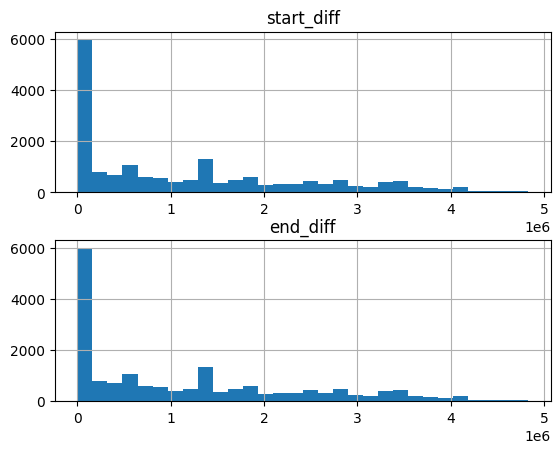

In [29]:
ep_df[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))

ep_df[['start_diff', 'end_diff']].describe()


In [32]:
df = ep_df.groupby('query_id').agg({'start_diff': 'min', 'end_diff': 'min'})


,start_diff,end_diff
count,7.050000e+02,7.050000e+02
mean,1.209128e+04,1.208377e+04
std,1.308492e+05,1.308478e+05
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00
50%,2.200000e+01,1.000000e+00
75%,3.400000e+01,2.800000e+01
max,1.622471e+06,1.622451e+06


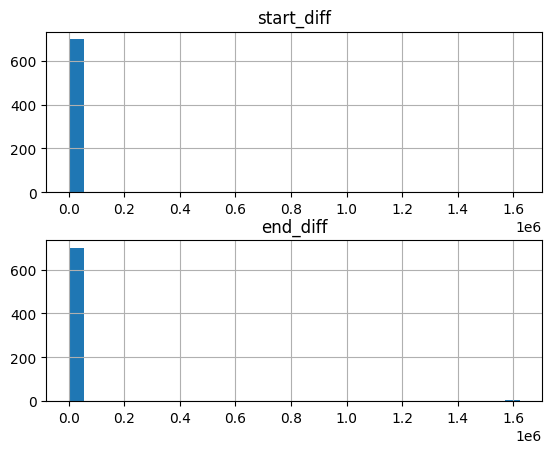

In [33]:
df[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))

df[['start_diff', 'end_diff']].describe()

In [38]:
def filter_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    no_outliers_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return no_outliers_df


array([[<Axes: title={'center': 'start_diff'}>],
       [<Axes: title={'center': 'end_diff'}>]], dtype=object)

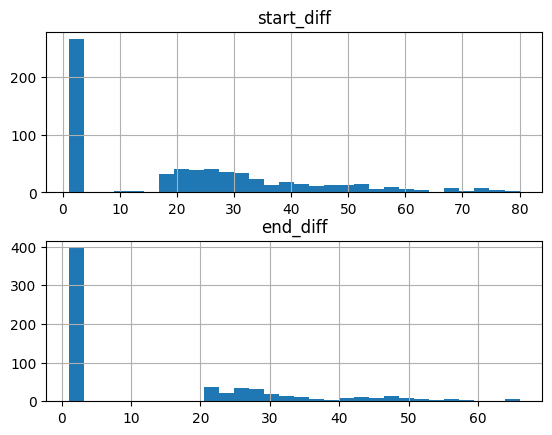

In [40]:
aggregated_filtered = filter_outliers(aggregated_df)
aggregated_filtered[['start_diff', 'end_diff']].hist(bins=30, layout=(2,1))